In [1]:
import os
from shutil import rmtree
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG=True
IPythonConsole.drawOptions.addAtomIndices=True
from tqdm import tqdm
import numpy as np
import pandas as pd

from serenityff.torsion.tree.dash_tree import DASHTorsionTree
from serenityff.charge.tree.atom_features import AtomFeatures
from serenityff.torsion.tree_develop.tree_constructor import Torsion_tree_constructor

In [2]:
data_file="../data/example_extraction.csv"
sdf_suply="../data/example.sdf" 
data_split = 0
out_folder = "./example_tree_out"
if os.path.exists(out_folder):
    rmtree(out_folder)
os.mkdir(out_folder)

In [3]:
mol_supplier = Chem.SDMolSupplier(sdf_suply, removeHs=False)
df_test = pd.read_csv(data_file)

In [4]:
df_test.groupby("mol_index").groups

{0: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17], 1: [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 2: [31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54], 3: [55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78], 4: [79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94], 5: [95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121], 6: [122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141], 7: [142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165], 8: [166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196], 9: [197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 

In [5]:
tree_constructor = Torsion_tree_constructor(df_path=data_file,
                sdf_suplier=sdf_suply,
                num_layers_to_build=16,
                data_split=data_split,
                verbose=True,
                sanitize=True,
                sanitize_charges=True)

2024-01-17 21:26:22.184868	Initializing Tree_constructor
2024-01-17 21:26:22.186237	Mols imported, starting df import
2024-01-17 21:26:22.192688	Sanitizing
2024-01-17 21:26:22.206940	Check charge sanity


100%|██████████| 20/20 [00:00<00:00, 2641.67it/s]

Number of wrong charged mols: 0 of 20 mols
2024-01-17 21:26:22.219452	df imported, starting data spliting
2024-01-17 21:26:22.220083	Splitting data
2024-01-17 21:26:22.223511	Data split, delete original
2024-01-17 21:26:22.253253	Starting table filling



100%|██████████| 431/431 [00:00<00:00, 2942.11it/s]

2024-01-17 21:26:22.404394	Table filled, starting adjacency matrix creation


Creating Adjacency matrices:


100%|██████████| 20/20 [00:00<00:00, 2413.36it/s]

Number of train mols: 20
Number of test mols: 0
2024-01-17 21:26:22.416523	Charge constructor build, creating torsion df
2024-01-17 21:26:22.418497	0/20 molecules processed


Found 183 torsions in the dataset
Found 0 errors in the dataset
Created a dataframe with (183, 9) torsions
2024-01-17 21:26:22.712726	Torison df created, creating root children


In [6]:
tree_constructor.df

,atomtype,idx_in_mol,mol_index,node_attentions,truth,h_connectivity,connected_atoms,total_connected_attention,atom_feature
1,N,0,0,"[0.05330947405009094, 0.0655702859466466, 0.05...",-0.000223,-1,"[1, 11, 10, 5]",0.548211,118420302
11,C,1,0,"[0.05131562488381837, 0.05943622669517859, 0.0...",0.000376,-1,"[11, 10, 5, 4]",0.490763,120236150
10,C,2,0,"[0.052315673451380156, 0.06099955964410038, 0....",0.000475,-1,"[10, 5, 4, 2]",0.327488,48197590
5,C,3,0,"[0.052359915679327206, 0.06584512757291977, 0....",-0.001387,-1,"[5, 4, 2, 1]",0.412529,118425182
4,N,4,0,"[0.05198067187032718, 0.07177987708876787, 0.0...",0.0016,-1,"[4, 2, 1, 11]",0.670198,120240908
...,...,...,...,...,...,...,...,...,...
406,C,2,19,"[0.03662447512365832, 0.037163860413569255, 0....",-0.490934,-1,"[2, 3, 4, 5]",0.36673,60418214
407,C,3,19,"[0.035285019837321366, 0.03745373971211091, 0....",-0.189262,-1,"[3, 4, 5, 6]",0.369222,151195731
410,O,4,19,"[0.029042437193256325, 0.040045953766984284, 0...",-0.007612,-1,"[6, 5, 7, 8]",0.60137,151194993
409,C,5,19,"[0.019444394729595877, 0.030420347852354694, 0...",0.498968,-1,"[5, 7, 8, 9]",0.340875,58512325


In [7]:
tree_constructor.create_tree_level_0()

Preparing Dataframe:
Number of unique atom features in df: 112
Creating Tree Level 0:


100%|██████████| 112/112 [00:00<00:00, 2048.98it/s]

2024-01-17 21:26:22.846778	Layer 0 done


In [8]:
tree_constructor.build_tree(num_processes=1)

AF=118420302 - Layer 1 done
children layer 1: [node --- lvl: 2, Num=1, fp=66, 3, 4]
AF 118420302 done
AF=120236150 - Layer 1 done
children layer 1: [node --- lvl: 2, Num=1, fp=80, 0, 4]
AF 120236150 done
AF=48197590 - Layer 1 done
children layer 1: [node --- lvl: 2, Num=1, fp=65, 3, 4]
AF 48197590 done
AF=118425182 - Layer 1 done
children layer 1: [node --- lvl: 2, Num=1, fp=80, 2, 4]
AF 118425182 done
AF=120240908 - Layer 1 done
children layer 1: [node --- lvl: 2, Num=1, fp=80, 1, 4]
AF 120240908 done
AF=48182706 - Layer 1 done
children layer 1: [node --- lvl: 2, Num=1, fp=80, 2, 4]
AF 48182706 done
AF=100693609 - Layer 1 done
children layer 1: [node --- lvl: 2, Num=1, fp=26, 3, 4]
AF 100693609 done
AF=100280244 - Layer 1 done
children layer 1: [node --- lvl: 2, Num=1, fp=55, 0, 4]
AF 100280244 done
AF=49849714 - Layer 1 done
children layer 1: [node --- lvl: 2, Num=1, fp=66, 3, 4]
AF 49849714 done
AF=100261851 - Layer 1 done
children layer 1: [node --- lvl: 2, Num=1, fp=66, 2, 4]
AF 1

In [9]:
print(tree_constructor.root.children[26])
print(tree_constructor.root.children[26].children)

node --- lvl: 1, Num=3, fp=60417354, -1, -1
[node --- lvl: 2, Num=1, fp=80, 2, 4, node --- lvl: 2, Num=1, fp=85, 1, 4, node --- lvl: 2, Num=1, fp=85, 3, 4]


In [10]:
print(type(tree_constructor.root.children[26]))
print(type(tree_constructor.root.children[26].children[0]))

<class 'serenityff.torsion.tree_develop.develop_node.DevelopNode'>
<class 'serenityff.torsion.tree_develop.develop_node.DevelopNode'>


In [11]:
tree_constructor.convert_tree_to_node(tree_folder_path="./example_tree_out")

Saving DASH tree data to 112 files in ./example_tree_out


  0%|          | 0/112 [00:00<?, ?it/s]/home/mlehner/serenityff-charge/serenityff/charge/tree/dash_tree.py:145: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->Index(['histogram'], dtype='object')]

  self.data_storage[branch_idx].to_hdf(df_path, key="df", mode="w")
100%|██████████| 112/112 [00:02<00:00, 47.32it/s] 


In [12]:
tr = tree_constructor.new_tree

<Axes: >

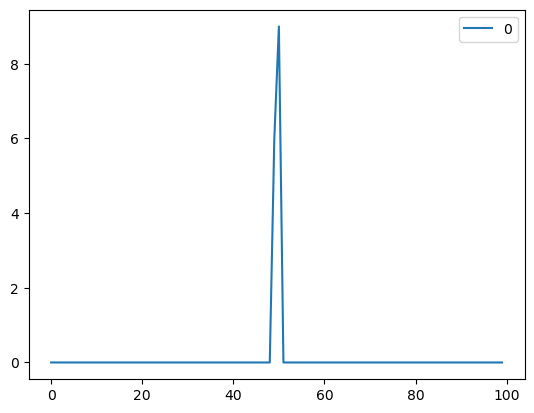

In [13]:
pd.DataFrame(tr.data_storage[49432962].iloc[0].histogram).plot()

In [14]:
example_tree = DASHTorsionTree(tree_folder_path="./example_tree_out")

Loading DASH tree data
Loaded 112 trees and data


In [15]:
for branch in example_tree.tree_storage:
    if len(example_tree.tree_storage[branch]) > 1:
        print(f"Branch {branch} has {len(example_tree.tree_storage[branch])} nodes")

Branch 154738000 has 17 nodes
Branch 50668334 has 8 nodes
Branch 47617114 has 9 nodes
Branch 118420425 has 15 nodes
Branch 118525352 has 9 nodes
Branch 100266708 has 10 nodes
Branch 100269028 has 9 nodes
Branch 118852060 has 10 nodes
Branch 116709381 has 10 nodes
Branch 48182706 has 10 nodes
Branch 145677671 has 9 nodes
Branch 145673029 has 8 nodes
Branch 49433084 has 107 nodes
Branch 49433085 has 57 nodes
Branch 48483924 has 9 nodes
Branch 60403324 has 26 nodes
Branch 114878764 has 8 nodes
Branch 154738122 has 10 nodes
Branch 49849837 has 6 nodes
Branch 59331560 has 17 nodes
Branch 154752269 has 10 nodes
Branch 202054268 has 4 nodes
Branch 62233934 has 10 nodes
Branch 145658882 has 10 nodes
Branch 60418214 has 23 nodes
Branch 58601506 has 8 nodes
Branch 140866208 has 2 nodes
Branch 118420302 has 10 nodes
Branch 120240908 has 10 nodes
Branch 100280244 has 10 nodes
Branch 145658761 has 4 nodes
Branch 100845836 has 10 nodes
Branch 114893654 has 13 nodes
Branch 59048880 has 8 nodes
Branch

In [16]:
mol_idx_test = tree_constructor.test_df.mol_index.unique().tolist()

In [17]:
tree_constructor.df.head()

,atomtype,idx_in_mol,mol_index,node_attentions,truth,h_connectivity,connected_atoms,total_connected_attention,atom_feature
1,N,0,0,"[0.05330947405009094, 0.0655702859466466, 0.05...",-0.000223,-1,"[1, 11, 10, 5, 4, 12, 6, 9, 0, 7, 2, 3, 8]",0.548211,118420302
11,C,1,0,"[0.05131562488381837, 0.05943622669517859, 0.0...",0.000376,-1,"[11, 10, 5, 4, 12, 1, 6, 9, 2, 7, 3, 8, 0]",0.490763,120236150
10,C,2,0,"[0.052315673451380156, 0.06099955964410038, 0....",0.000475,-1,"[10, 5, 4, 2, 1, 3, 6, 9, 0, 11, 8, 12, 7]",0.327488,48197590
5,C,3,0,"[0.052359915679327206, 0.06584512757291977, 0....",-0.001387,-1,"[5, 4, 2, 1, 3, 6, 0, 11, 12, 10, 9, 8, 7]",0.412529,118425182
4,N,4,0,"[0.05198067187032718, 0.07177987708876787, 0.0...",0.0016,-1,"[4, 2, 1, 11, 3, 12, 0, 10, 9, 5, 6, 7, 8]",0.670198,120240908


In [18]:
from serenityff.torsion.tree.dash_utils import get_canon_torsion_feature

In [19]:
af1, af2, af3, af4 = [AtomFeatures.atom_features_from_molecule(mol_supplier[0], atom_i) for atom_i in [2, 1, 3, 4]]

In [20]:
print(af1, af2, af3, af4)

26 65 80 66


In [21]:
get_canon_torsion_feature(af1, af2, af3, af4)

121044644

In [22]:
matched_node_path = example_tree.match_new_atom(atom=[2, 1, 3, 4], mol=mol_supplier[1])

In [23]:
matched_node_path

[156553111, 0, 1, 2, 3, 4, 5]

In [24]:
example_tree.get_atom_properties(matched_node_path=matched_node_path)

level                                                            6
atom_type                                                       55
con_atom                                                         3
con_type                                                         4
max_attention                                             0.070568
size                                                             1
histogram        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: 5, dtype: object

In [25]:
#rmtree(out_folder)